In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file = "globalpowerplantdatabasev110/global_power_plant_database.csv"
power = pd.read_csv(file)

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Standard deviation of Megawatt Capacity aggregated by country')

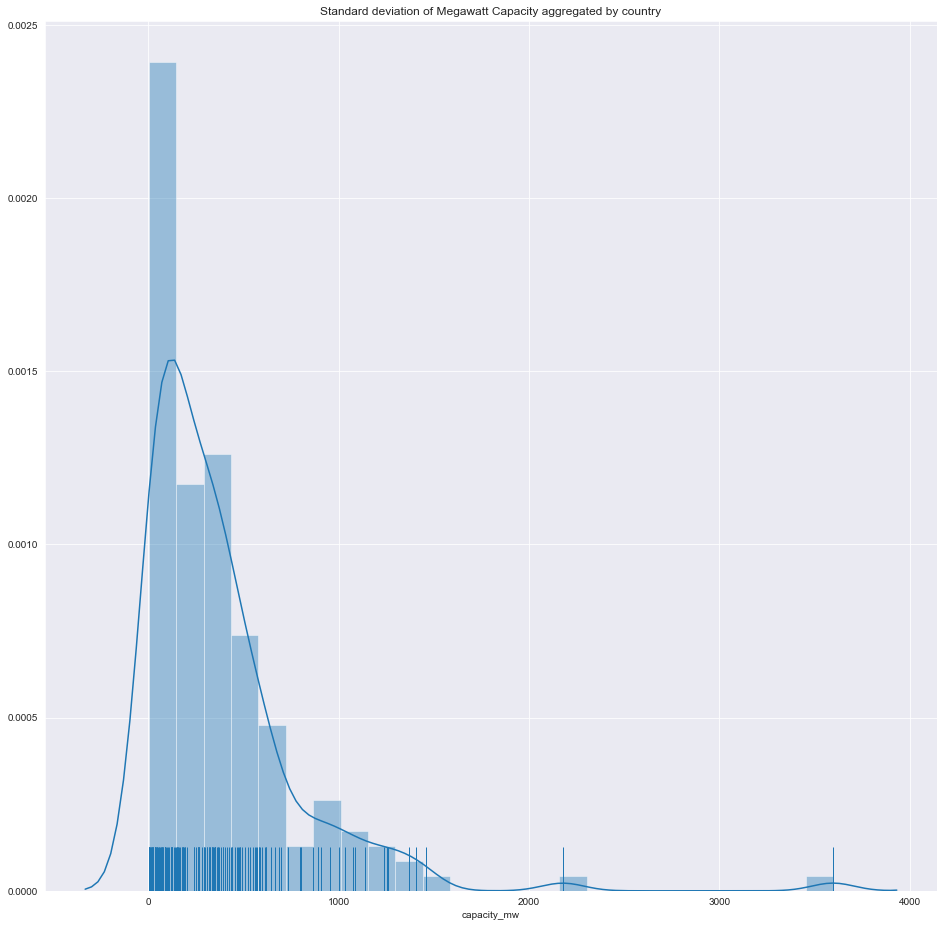

In [137]:
plt.figure(figsize=(16,16))
sns.set_style('darkgrid')
sns.distplot(power.groupby('country')['capacity_mw'].agg(np.std).dropna(), rug=True).set_title('Standard deviation of Megawatt Capacity aggregated by country')

In [138]:
power1 = power[(power['fuel1'].notnull()) & (power['commissioning_year'].notnull())]
power1.loc[:, 'commissioning_year'] = power1.loc[:, 'commissioning_year'].map(int)

power2 = pd.DataFrame()
for val in power1['fuel1'].value_counts()[:6].index.values:

    if val == 'Hydro':
        power2 = power1[power1['fuel1'] == val]
    else:
        power2 = power2.append(power1[power1['fuel1'] == val])
        
power2.info()
# If this works, country, commissioning_year will have the same count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13387 entries, 7 to 28424
Data columns (total 22 columns):
country                     13387 non-null object
country_long                13387 non-null object
name                        13387 non-null object
gppd_idnr                   13387 non-null object
capacity_mw                 13387 non-null float64
latitude                    13387 non-null float64
longitude                   13387 non-null float64
fuel1                       13387 non-null object
fuel2                       1449 non-null object
fuel3                       189 non-null object
fuel4                       51 non-null object
commissioning_year          13387 non-null int64
owner                       10200 non-null object
source                      13387 non-null object
url                         13387 non-null object
geolocation_source          13259 non-null object
year_of_capacity_data       9368 non-null float64
generation_gwh_2013         383 non-null floa

C:\Users\seapea\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


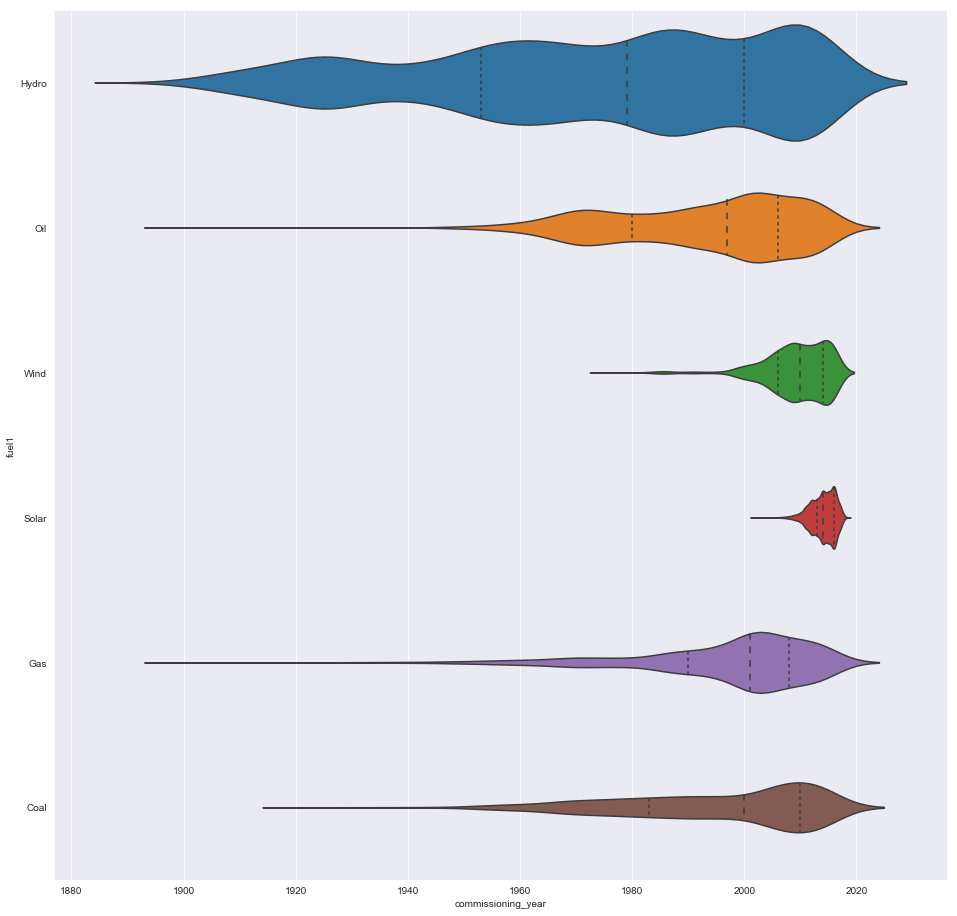

In [139]:
plt.figure(figsize=(16,16))
sns.violinplot(x='commissioning_year', y='fuel1', data=power2, inner='quartile', scale='count')

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


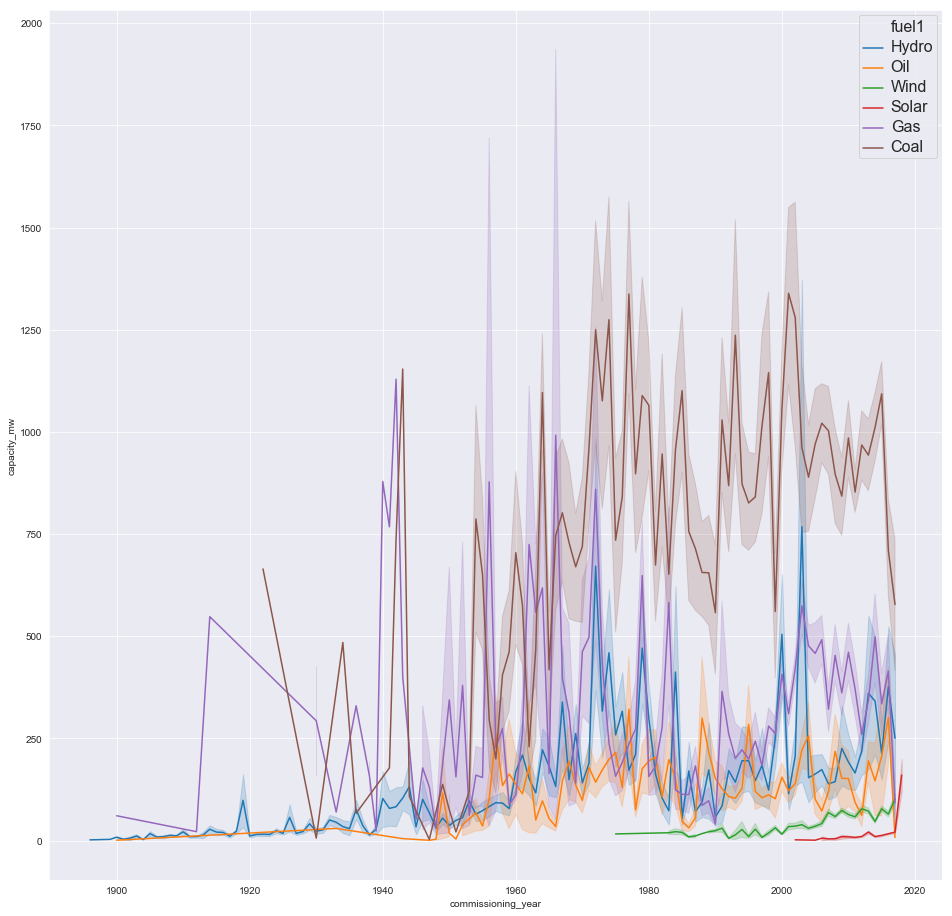

In [140]:
plt.figure(figsize=(16,16))
ax = sns.lineplot(x='commissioning_year', y='capacity_mw', data=power2, hue='fuel1', estimator='mean', ci=68)
plt.setp(ax.get_legend().get_texts(), fontsize='16')
plt.show()

In [142]:
# Set a countries list for pulling crosstab below
countries_of_interest = ['USA', 'CHN', 'GER', 'FRA', 'RUS', 'IND', 'JPN', 'CAN', 'BRA', 'ITA']

# Set renewable booleans on dataframe
power1['renewable'] = pd.DataFrame([(power1['fuel1'] != 'Oil') & (power1['fuel1'] != 'Gas') & (power1['fuel1'] != 'Coal')]).T

# Create crosstab to group renewable or not against commissioning year prior to 2000 or not on countries of interest
power_new = pd.crosstab([power1['country'], power1['commissioning_year'] < 2000], power1['renewable']).loc[countries_of_interest]

C:\Users\seapea\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [254]:
power_new

renewable                   False  True 
country commissioning_year              
BRA     False                 520   1103
        True                   98    254
CAN     False                  13      0
        True                   16      0
CHN     False                 615     86
        True                  155     65
FRA     True                    0     66
IND     False                 165     72
        True                   80    164
ITA     False                  21     14
        True                   13     19
JPN     False                  11     10
        True                    6     22
RUS     False                   9      1
        True                   76      5
USA     False                1127   3248
        True                 1858   1865

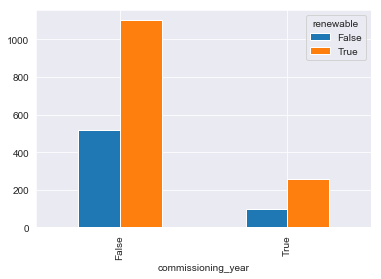

In [252]:
power_new.loc['BRA'].plot(kind='bar')

In [273]:
power_new.columns.name

'renewable'

In [247]:
power_new.sum(level=0)

renewable,False,True
country,,
BRA,618,1357
CAN,29,0
CHN,770,151
FRA,0,66
IND,245,236
ITA,34,33
JPN,17,32
RUS,85,6
USA,2985,5113


In [248]:
#sns.catplot(x='country', y='renewable', data=power_new.reset_index())